In [13]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D, Activation, Reshape, LeakyReLU, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
feat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])
    
    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])
    
    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]
    
    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]
    
    # load train labels
    train_labels = all_labels[:train_num]
    
    # load test data
    test_data = all_data[train_num:]
    
    # load test labels
    test_labels = all_labels[train_num:]
    
    return train_data, train_labels, test_data, test_labels

# Test on original dataset

In [5]:
# load data
xls = pd.ExcelFile('../CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)
y_train = y_train-1
y_test = y_test - 1

In [6]:
lrmodel = Sequential()

lrmodel.add(Dense(3, activation="softmax"))

In [ ]:
lrmodel.compile(optimizer="adam", loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = lrmodel.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 14.0097 - accuracy: 0.7865 - val_loss: 11.4076 - val_accuracy: 0.7629
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 9.0358 - accuracy: 0.7382 - val_loss: 7.5539 - val_accuracy: 0.6526
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 7.3163 - accuracy: 0.6159 - val_loss: 6.8541 - val_accuracy: 0.5986
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 6.5443 - accuracy: 0.6271 - val_loss: 6.1604 - val_accuracy: 0.6596
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 5.7611 - accuracy: 0.6671 - val_loss: 5.3517 - val_accuracy: 0.6526
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 4.9652 - accuracy: 0.6500 - val_loss: 4.5785 - val_accuracy: 0.6455
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 4.2540 - accuracy: 0.6441 - val_loss: 3.8969 - val_accuracy: 0.6526
Epoch 8/10

In [ ]:
y_pred = lrmodel.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of Bernoulli NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Bernoulli NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Bernoulli NB: 0.7981220657276995
F-score of Bernoulli NB: 0.6426944668432366


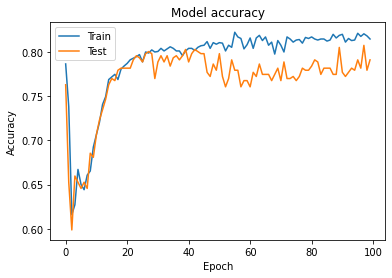

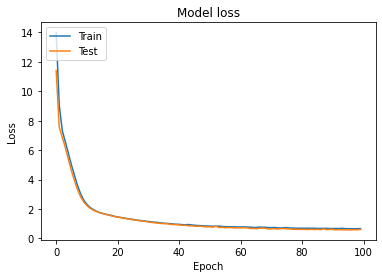

In [ ]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Test on artificial data:

In [15]:
# load data
xls = pd.ExcelFile('../data_creation/artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 5400)
y_train = y_train-1
y_test = y_test - 1

Normalize data:

In [16]:
x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test))/(np.max(x_test) - np.min(x_test))

In [27]:
lrmodel1 = Sequential()

lrmodel1.add(Dense(3, activation="softmax"))

In [28]:
lrmodel1.compile(optimizer="adam", loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist1 = lrmodel1.fit(x_train, y_train, batch_size=16, epochs=120, validation_data=(x_test, y_test))

Epoch 1/120
203/203 [==============================] - 1s 4ms/step - loss: 1.0695 - accuracy: 0.4420 - val_loss: 1.0413 - val_accuracy: 0.4895
Epoch 2/120
203/203 [==============================] - 1s 3ms/step - loss: 1.0229 - accuracy: 0.5388 - val_loss: 1.0003 - val_accuracy: 0.5499
Epoch 3/120
203/203 [==============================] - 1s 3ms/step - loss: 0.9861 - accuracy: 0.5786 - val_loss: 0.9670 - val_accuracy: 0.5869
Epoch 4/120
203/203 [==============================] - 1s 3ms/step - loss: 0.9530 - accuracy: 0.6042 - val_loss: 0.9339 - val_accuracy: 0.6017
Epoch 5/120
203/203 [==============================] - 1s 3ms/step - loss: 0.9229 - accuracy: 0.6168 - val_loss: 0.9056 - val_accuracy: 0.6054
Epoch 6/120
203/203 [==============================] - 1s 3ms/step - loss: 0.8957 - accuracy: 0.6242 - val_loss: 0.8776 - val_accuracy: 0.6289
Epoch 7/120
203/203 [==============================] - 1s 3ms/step - loss: 0.8706 - accuracy: 0.6501 - val_loss: 0.8563 - val_accuracy: 0.6215

In [29]:
y_pred = lrmodel1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of Bernoulli NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Bernoulli NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Bernoulli NB: 0.843403205918619
F-score of Bernoulli NB: 0.8367657639402063


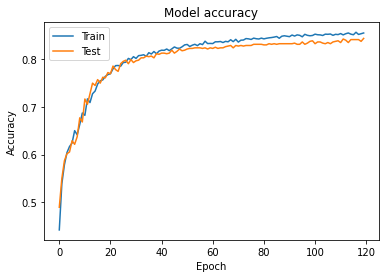

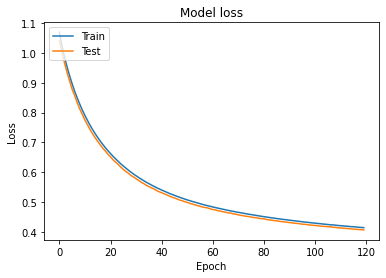

In [30]:
# Plot training & validation accuracy values
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()